In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
df = pd.DataFrame()
with open("clusterK.list",'r') as tasks:
    for line in tasks:
        path_to_designs = line.strip()
        cluster = path_to_designs.split("/")[0]
        score_file = path_to_designs + "/score.sc"
        score_dict = pd.read_csv(score_file, header=1, sep = '\s+')
        best_design = score_dict.loc[score_dict['total_score'] == score_dict['total_score'].min()]
        df = df.append(best_design)
        for index,row in best_design.iterrows():
            pdb = row["description"] + ".pdb"
            source = path_to_designs + '/' + pdb
            target = cluster + "/best_designs/" + pdb
            copyfile(source, target)
    print(df)

    SCORE:  total_score  aa_composition  angle_constraint  \
6   SCORE:     -463.442             0.0               0.0   
6   SCORE:     -445.412             0.0               0.0   
1   SCORE:     -452.449             0.0               0.0   
0   SCORE:     -425.859             0.0               0.0   
4   SCORE:     -449.974             0.0               0.0   
2   SCORE:     -452.507             0.0               0.0   
0   SCORE:     -450.725             0.0               0.0   
1   SCORE:     -448.638             0.0               0.0   
2   SCORE:     -455.175             0.0               0.0   
9   SCORE:     -438.706             0.0               0.0   
8   SCORE:     -444.033             0.0               0.0   
0   SCORE:     -456.692             0.0               0.0   
3   SCORE:     -456.075             0.0               0.0   
3   SCORE:     -456.745             0.0               0.0   
3   SCORE:     -449.586             0.0               0.0   
9   SCORE:     -463.220 

In [3]:
df = pd.DataFrame()
with open("task.list",'r') as tasks:
    for line in tasks:
        path_to_designs = line.strip()
        cluster = path_to_designs.split("/")[0]
        score_file = path_to_designs + "/score.sc"
        score_dict = pd.read_csv(score_file, header=1, sep = '\s+')
        best_design = score_dict.loc[score_dict['total_score'] == score_dict['total_score'].min()]
        best_design['cluster'] = cluster
        df = df.append(best_design)
    print(df)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


    SCORE:  total_score  aa_composition  angle_constraint  \
0   SCORE:     -469.180             0.0               0.0   
9   SCORE:     -458.851             0.0               0.0   
8   SCORE:     -467.360             0.0               0.0   
0   SCORE:     -464.530             0.0               0.0   
7   SCORE:     -461.139             0.0               0.0   
6   SCORE:     -445.454             0.0               0.0   
6   SCORE:     -446.933             0.0               0.0   
9   SCORE:     -450.823             0.0               0.0   
0   SCORE:     -462.456             0.0               0.0   
0   SCORE:     -430.006             0.0               0.0   
3   SCORE:     -430.114             0.0               0.0   
0   SCORE:     -442.600             0.0               0.0   
2   SCORE:     -439.531             0.0               0.0   
9   SCORE:     -450.394             0.0               0.0   
9   SCORE:     -449.140             0.0               0.0   
8   SCORE:     -467.399 

In [4]:
df_K = pd.DataFrame()
with open("clusterK.list",'r') as tasks:
    for line in tasks:
        path_to_designs = line.strip()
        cluster = path_to_designs.split("/")[0]
        score_file = path_to_designs + "/score.sc"
        score_dict = pd.read_csv(score_file, header=1, sep = '\s+')
        best_design = score_dict.loc[score_dict['total_score'] == score_dict['total_score'].min()]
        best_design['cluster'] = cluster
        df_K = df_K.append(best_design)
    print(df_K)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


    SCORE:  total_score  aa_composition  angle_constraint  \
6   SCORE:     -463.442             0.0               0.0   
6   SCORE:     -445.412             0.0               0.0   
1   SCORE:     -452.449             0.0               0.0   
0   SCORE:     -425.859             0.0               0.0   
4   SCORE:     -449.974             0.0               0.0   
2   SCORE:     -452.507             0.0               0.0   
0   SCORE:     -450.725             0.0               0.0   
1   SCORE:     -448.638             0.0               0.0   
2   SCORE:     -455.175             0.0               0.0   
9   SCORE:     -438.706             0.0               0.0   
8   SCORE:     -444.033             0.0               0.0   
0   SCORE:     -456.692             0.0               0.0   
3   SCORE:     -456.075             0.0               0.0   
3   SCORE:     -456.745             0.0               0.0   
3   SCORE:     -449.586             0.0               0.0   
9   SCORE:     -463.220 

In [5]:
df_all = pd.concat([df, df_K], join='outer').drop_duplicates().reset_index(drop=True)
print(df_all)

     SCORE:  total_score  aa_composition  angle_constraint  \
0    SCORE:     -469.180             0.0               0.0   
1    SCORE:     -458.851             0.0               0.0   
2    SCORE:     -467.360             0.0               0.0   
3    SCORE:     -464.530             0.0               0.0   
4    SCORE:     -461.139             0.0               0.0   
5    SCORE:     -445.454             0.0               0.0   
6    SCORE:     -446.933             0.0               0.0   
7    SCORE:     -450.823             0.0               0.0   
8    SCORE:     -462.456             0.0               0.0   
9    SCORE:     -430.006             0.0               0.0   
10   SCORE:     -430.114             0.0               0.0   
11   SCORE:     -442.600             0.0               0.0   
12   SCORE:     -439.531             0.0               0.0   
13   SCORE:     -450.394             0.0               0.0   
14   SCORE:     -449.140             0.0               0.0   
15   SCO

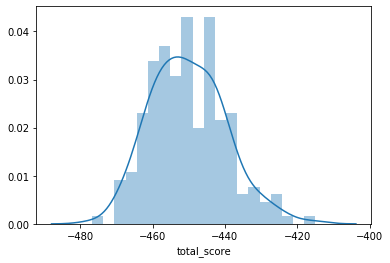

In [9]:
sns.distplot(df_all["total_score"], bins=20)

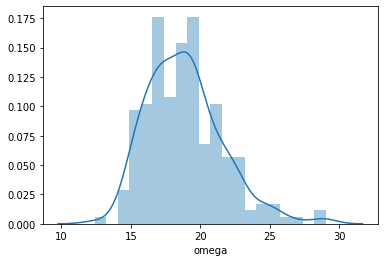

In [10]:
sns.distplot(df_all["omega"], bins=20)

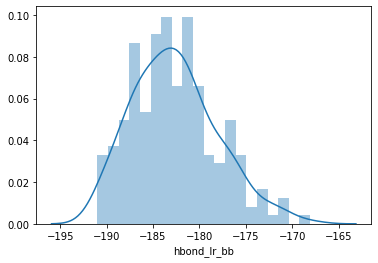

In [11]:
sns.distplot(df_all["hbond_lr_bb"], bins=20)

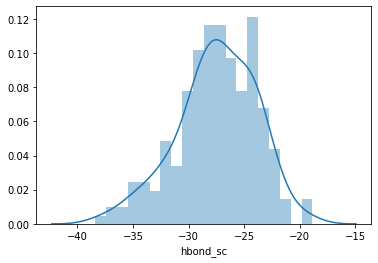

In [12]:
sns.distplot(df_all["hbond_sc"], bins=20)

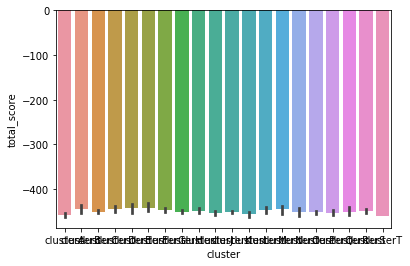

In [13]:
sns.barplot(x="cluster", y="total_score", data=df_all)

In [14]:
dselected = df_all.loc[(df_all["total_score"] < -340.0) & (df_all["omega"] < 20) & (df_all["hbond_sc"] < -22)]
dselected.shape

(149, 30)

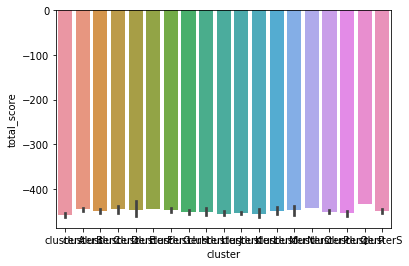

In [15]:
sns.barplot(x="cluster", y="total_score", data=dselected)

In [6]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY(sequence):
    tot_score = 0
    for aa in sequence:
        tot_score += hydro_scale[aa]
    hydro_score = tot_score/len(sequence)
    
    return hydro_score

In [7]:
turn1 = "NTDNT"
turn2 = "NNSSL"
turn3 = "NTDNT"
turn4 = "NNSSL"

def replace_turns(sequence):
    hairpin1 = sequence[0:15]
    hairpin2 = sequence[20:43]
    hairpin3 = sequence[48:75]
    hairpin4 = sequence[80:105]
    hairpin5 = sequence[110:]
    des = hairpin1 + turn1 + hairpin2 + turn2 + hairpin3 + turn3 + hairpin4 + turn4 + hairpin5
    return(des)

In [8]:
def read_raptor_file(file):
    ss = ''
    sequence = ''
    with open(file, 'r') as in_ss_pred:
        for line in in_ss_pred:
            if "DSSP" in line or "# Ordered" in line:
                for line in in_ss_pred:
                    vals = line.split()
                    sequence += vals[1]
                    ss += vals[2]
    return(ss, sequence)

In [9]:
for index, row in df_all.iterrows():
    fasta_file = row['cluster'] + '/best_designs/' + row['description'] + ".fasta"
    seq = ''
    with open(fasta_file, 'r') as in_fasta:
        for line in in_fasta:
            if line[0] == '>':
                seq = next(in_fasta).strip()
    final_seq = replace_turns(seq)
#    print(final_seq)
    gravy = GRAVY(final_seq)
    df_all.loc[index,'sequence'] = final_seq
    df_all.loc[index,'GRAVY'] = gravy
    new_fasta = row['cluster'] + '/best_designs/' + row['description'] + "_T3.fasta"
    with open(new_fasta, 'w') as out_fasta:
        out_fasta.write(">%s.pdb\n" %(row['description']))
        out_fasta.write(final_seq+'\n')

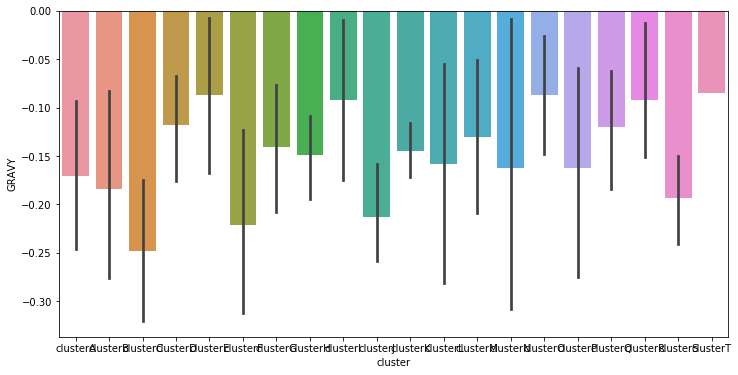

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x="cluster", y="GRAVY", data=df_all)

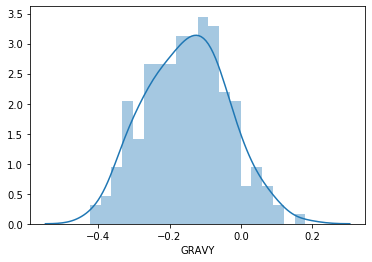

In [45]:
sns.distplot(df_all["GRAVY"], bins=20)

In [10]:
for index, row in df_all.iterrows():
    ss3_pred_file = row['cluster'] + '/best_designs/' + row['description'] + "_T3/" + row['description'] + '_T3.ss3'
    ss8_pred_file = row['cluster'] + '/best_designs/' + row['description'] + "_T3/" + row['description'] + '_T3.ss8'
    ss3_pred,seq3 = read_raptor_file(ss3_pred_file)
    ss8_pred,seq8 = read_raptor_file(ss8_pred_file)
#    print(seq3,row['sequence'])
    if seq3 == row['sequence']:
        df_all.loc[index,'ss3'] = ss3_pred
    if seq8 == row['sequence']:
        df_all.loc[index,'ss8'] = ss8_pred

In [11]:
df_all["H3"] = df_all["ss3"].str.count('H')
df_all["H8"] = df_all["ss8"].str.count('H')

In [12]:
for index, row in df_all.iterrows():
    diso_pred_file = row['cluster'] + '/best_designs/' + row['description'] + "_T3/" + row['description'] + '_T3.diso'

    diso_pred,seq = read_raptor_file(diso_pred_file)

#    print(seq3,row['sequence'])
    if seq == row['sequence']:
        df_all.loc[index,'disorder'] = diso_pred


In [13]:
df_all["n_diso"] = df_all["disorder"].str.count('\*')

In [14]:
print(df_all)

     SCORE:  total_score  aa_composition  angle_constraint  \
0    SCORE:     -469.180             0.0               0.0   
1    SCORE:     -458.851             0.0               0.0   
2    SCORE:     -467.360             0.0               0.0   
3    SCORE:     -464.530             0.0               0.0   
4    SCORE:     -461.139             0.0               0.0   
5    SCORE:     -445.454             0.0               0.0   
6    SCORE:     -446.933             0.0               0.0   
7    SCORE:     -450.823             0.0               0.0   
8    SCORE:     -462.456             0.0               0.0   
9    SCORE:     -430.006             0.0               0.0   
10   SCORE:     -430.114             0.0               0.0   
11   SCORE:     -442.600             0.0               0.0   
12   SCORE:     -439.531             0.0               0.0   
13   SCORE:     -450.394             0.0               0.0   
14   SCORE:     -449.140             0.0               0.0   
15   SCO

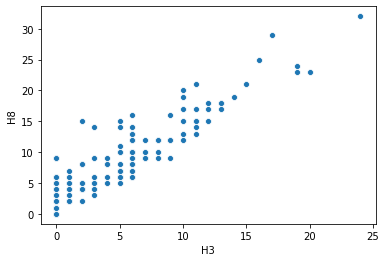

In [74]:
sns.scatterplot(x=df_all.H3,y=df_all.H8)

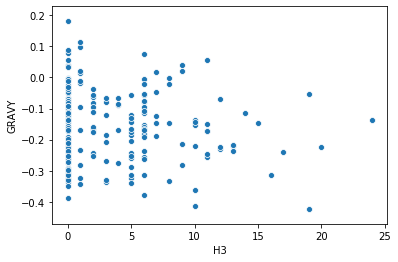

In [75]:
sns.scatterplot(x=df_all.H3,y=df_all.GRAVY)

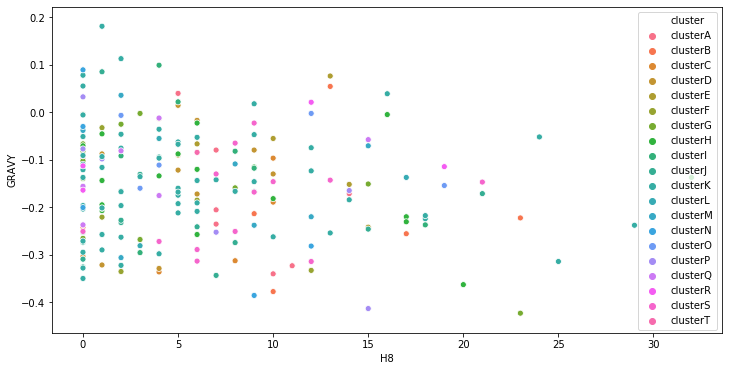

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_all.H8,y=df_all.GRAVY,hue=df_all.cluster)

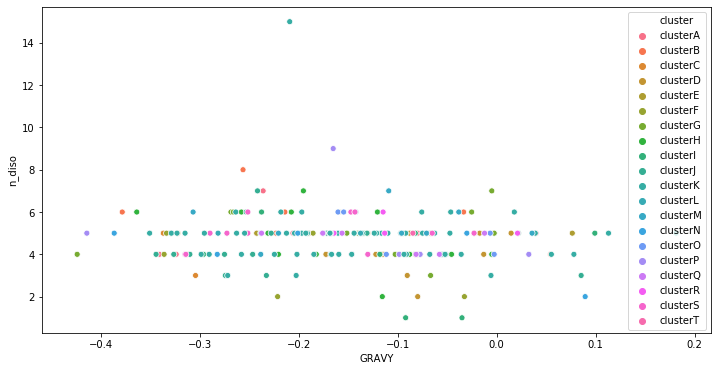

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_all.GRAVY,y=df_all.n_diso,hue=df_all.cluster)

In [80]:
df_all.loc[df_all['GRAVY'] >= 0.0]

SCORE:  total_score  aa_composition  angle_constraint  \
8    SCORE:     -462.456             0.0               0.0   
15   SCORE:     -467.399             0.0               0.0   
26   SCORE:     -453.987             0.0               0.0   
39   SCORE:     -454.054             0.0               0.0   
75   SCORE:     -444.493             0.0               0.0   
77   SCORE:     -451.813             0.0               0.0   
88   SCORE:     -459.352             0.0               0.0   
102  SCORE:     -449.974             0.0               0.0   
107  SCORE:     -438.706             0.0               0.0   
111  SCORE:     -456.745             0.0               0.0   
121  SCORE:     -463.889             0.0               0.0   
125  SCORE:     -454.430             0.0               0.0   
139  SCORE:     -449.029             0.0               0.0   
148  SCORE:     -436.799             0.0               0.0   
153  SCORE:     -462.350             0.0               0.0   
166  SCORE:     -458.792             0.0               0.0   
177  SCORE:     -454.934             0.0               0.0   

     atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
8                     0.0                0.517        0.0 -624.222  124.425   
15                    0.0                0.984        0.0 -632.796  131.423   
26                    0.0                0.750        0.0 -617.845  131.362   
39                    0.0                0.825        0.0 -604.309  131.645   
75                    0.0                1.961        0.0 -614.387  131.874   
77                    0.0                0.977        0.0 -650.935  135.095   
88                    0.0                0.901        0.0 -618.184  121.488   
102                   0.0                0.695        0.0 -614.716  124.872   
107                   0.0                1.555        0.0 -621.964  122.011   
111                   0.0                0.762        0.0 -638.944  137.962   
121                   0.0                0.477        0.0 -634.571  119.004   
125                   0.0                1.179        0.0 -624.219  121.251   
139                   0.0                0.308        0.0 -630.337  130.261   
148                   0.0                0.540        0.0 -626.218  128.361   
153                   0.0                0.898        0.0 -661.620  120.846   
166                   0.0                1.769        0.0 -622.719  117.120   
177                   0.0                0.884        0.0 -607.454  118.755   

     fa_elec  ...  sc_buns_hbnetA  yhh_planarity  \
8   -264.139  ...             0.0          0.626   
15  -286.708  ...             1.0          1.171   
26  -272.554  ...             0.0          0.545   
39  -282.476  ...             1.0          0.863   
75  -261.770  ...             0.0          1.656   
77  -269.803  ...             2.0          0.957   
88  -265.193  ...             1.0          0.697   
102 -272.211  ...             0.0          0.906   
107 -266.893  ...             0.0          0.974   
111 -277.570  ...             1.0          0.806   
121 -264.837  ...             0.0          1.543   
125 -266.052  ...             2.0          0.889   
139 -268.256  ...             1.0          0.277   
148 -266.233  ...             1.0          0.538   
153 -253.790  ...             0.0          1.258   
166 -257.375  ...             0.0          0.804   
177 -276.568  ...             0.0          0.801   

                                        description   cluster  \
8         48__input_0158_0004_5_0002_0010_0007_0001  clusterA   
15    4__input_0097_0004_5_0005_0010_0005_0003_0009  clusterB   
26   31__input_0119_0002_2_0002_0001_0006_0009_0009  clusterD   
39         6__input_0142_0005_1_0005_0003_0008_0003  clusterE   
75   13__input_0157_0005_3_0003_0006_0010_0003_0003  clusterI   
77   33__input_0063_0005_1_0001_0001_0002_0002_0002  clusterI   
88   40__input_0022_0001_1_0005_0007_0007_0008_0004  clusterJ   
102  11_

In [101]:
df_all.loc[df_all['H3'] >= 6]

SCORE:  total_score  aa_composition  angle_constraint  \
0    SCORE:     -469.180             0.0               0.0   
1    SCORE:     -458.851             0.0               0.0   
4    SCORE:     -461.139             0.0               0.0   
9    SCORE:     -430.006             0.0               0.0   
11   SCORE:     -442.600             0.0               0.0   
12   SCORE:     -439.531             0.0               0.0   
14   SCORE:     -449.140             0.0               0.0   
15   SCORE:     -467.399             0.0               0.0   
16   SCORE:     -456.092             0.0               0.0   
18   SCORE:     -453.642             0.0               0.0   
34   SCORE:     -447.997             0.0               0.0   
36   SCORE:     -460.576             0.0               0.0   
39   SCORE:     -454.054             0.0               0.0   
40   SCORE:     -443.607             0.0               0.0   
47   SCORE:     -441.042             0.0               0.0   
48   SCORE:     -439.304             0.0               0.0   
53   SCORE:     -437.379             0.0               0.0   
57   SCORE:     -448.144             0.0               0.0   
58   SCORE:     -460.307             0.0               0.0   
60   SCORE:     -455.582             0.0               0.0   
62   SCORE:     -451.591             0.0               0.0   
64   SCORE:     -445.632             0.0               0.0   
65   SCORE:     -450.526             0.0               0.0   
67   SCORE:     -443.603             0.0               0.0   
72   SCORE:     -459.574             0.0               0.0   
74   SCORE:     -436.467             0.0               0.0   
82   SCORE:     -460.489             0.0               0.0   
87   SCORE:     -442.149             0.0               0.0   
104  SCORE:     -450.725             0.0               0.0   
113  SCORE:     -463.220             0.0               0.0   
114  SCORE:     -448.144             0.0               0.0   
121  SCORE:     -463.889             0.0               0.0   
125  SCORE:     -454.430             0.0               0.0   
129  SCORE:     -458.992             0.0               0.0   
132  SCORE:     -438.780             0.0               0.0   
133  SCORE:     -445.286             0.0               0.0   
138  SCORE:     -451.260             0.0               0.0   
140  SCORE:     -452.125             0.0               0.0   
142  SCORE:     -444.720             0.0               0.0   
146  SCORE:     -454.375             0.0               0.0   
149  SCORE:     -459.469             0.0               0.0   
151  SCORE:     -451.728             0.0               0.0   
155  SCORE:     -432.708             0.0               0.0   
161  SCORE:     -455.872             0.0               0.0   
162  SCORE:     -456.052             0.0               0.0   
167  SCORE:     -452.911             0.0               0.0   
175  SCORE:     -457.025             0.0               0.0   
177  SCORE:     -454.934             0.0               0.0   
179  SCORE:     -451.681             0.0               0.0   
180  SCORE:     -462.446             0.0               0.0   
181  SCORE:     -442.690             0.0               0.0   
184  SCORE:     -449.574             0.0               0.0   
185  SCORE:     -460.704             0.0               0.0   
190  SCORE:     -443.995             0.0               0.0   
198  SCORE:     -444.563             0.0               0.0   
201  SCORE:     -463.793             0.0               0.0   
203  SCORE:     -436.484             0.0               0.0   
206  SCORE:     -456.610             0.0               0.0   
207  SCORE:     -443.329             0.0               0.0   
208  SCORE:     -462.720             0.0               0.0   

     atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
0                     0.0                1.082        0.0 -636.653  136.163   
1                     0.0                0.406        0.0 -617.5

In [82]:
df_all.loc[df_all['H8'] >= 6]

SCORE:  total_score  aa_composition  angle_constraint  \
2    SCORE:     -467.360             0.0               0.0   
4    SCORE:     -461.139             0.0               0.0   
7    SCORE:     -450.823             0.0               0.0   
9    SCORE:     -430.006             0.0               0.0   
11   SCORE:     -442.600             0.0               0.0   
12   SCORE:     -439.531             0.0               0.0   
14   SCORE:     -449.140             0.0               0.0   
15   SCORE:     -467.399             0.0               0.0   
16   SCORE:     -456.092             0.0               0.0   
18   SCORE:     -453.642             0.0               0.0   
29   SCORE:     -451.573             0.0               0.0   
31   SCORE:     -442.647             0.0               0.0   
34   SCORE:     -447.997             0.0               0.0   
35   SCORE:     -436.298             0.0               0.0   
36   SCORE:     -460.576             0.0               0.0   
39   SCORE:     -454.054             0.0               0.0   
40   SCORE:     -443.607             0.0               0.0   
47   SCORE:     -441.042             0.0               0.0   
48   SCORE:     -439.304             0.0               0.0   
57   SCORE:     -448.144             0.0               0.0   
58   SCORE:     -460.307             0.0               0.0   
60   SCORE:     -455.582             0.0               0.0   
62   SCORE:     -451.591             0.0               0.0   
64   SCORE:     -445.632             0.0               0.0   
65   SCORE:     -450.526             0.0               0.0   
72   SCORE:     -459.574             0.0               0.0   
74   SCORE:     -436.467             0.0               0.0   
80   SCORE:     -446.948             0.0               0.0   
82   SCORE:     -460.489             0.0               0.0   
87   SCORE:     -442.149             0.0               0.0   
..      ...          ...             ...               ...   
121  SCORE:     -463.889             0.0               0.0   
125  SCORE:     -454.430             0.0               0.0   
129  SCORE:     -458.992             0.0               0.0   
140  SCORE:     -452.125             0.0               0.0   
142  SCORE:     -444.720             0.0               0.0   
149  SCORE:     -459.469             0.0               0.0   
150  SCORE:     -458.756             0.0               0.0   
151  SCORE:     -451.728             0.0               0.0   
155  SCORE:     -432.708             0.0               0.0   
157  SCORE:     -443.076             0.0               0.0   
161  SCORE:     -455.872             0.0               0.0   
162  SCORE:     -456.052             0.0               0.0   
167  SCORE:     -452.911             0.0               0.0   
168  SCORE:     -453.176             0.0               0.0   
169  SCORE:     -453.512             0.0               0.0   
175  SCORE:     -457.025             0.0               0.0   
177  SCORE:     -454.934             0.0               0.0   
179  SCORE:     -451.681             0.0               0.0   
180  SCORE:     -462.446             0.0               0.0   
181  SCORE:     -442.690             0.0               0.0   
184  SCORE:     -449.574             0.0               0.0   
185  SCORE:     -460.704             0.0               0.0   
190  SCORE:     -443.995             0.0               0.0   
196  SCORE:     -438.484             0.0               0.0   
198  SCORE:     -444.563             0.0               0.0   
201  SCORE:     -463.793             0.0               0.0   
203  SCORE:     -436.484             0.0               0.0   
206  SCORE:     -456.610             0.0               0.0   
207  SCORE:     -443.329             0.0               0.0   
208  SCORE:     -462.720             0.0               0.0   

     atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
2                     0.0                0.684        0.0 -610.073  127.724   
4 

In [15]:
fdiso = df_all.loc[df_all['n_diso']>9]
print(fdiso)

     SCORE:  total_score  aa_composition  angle_constraint  \
193  SCORE:     -456.716             0.0               0.0   

     atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
193                   0.0                 1.23        0.0 -608.356  137.882   

     fa_elec  ...                                     description   cluster  \
193 -295.061  ...  30__input_0014_0002_2_0002_0007_0005_0008_0010  clusterK   

                                              sequence     GRAVY  \
193  PDPPGTVAIFVMVGFNTDNTLSIAGGLEYAVSPYVFVDAGYGWNNS... -0.208943   

                                                   ss3  \
193  CCCCCEEEEEEEECCCCCCHEEHHCCCCCCCCCCEEEECCCCCCCC...   

                                                   ss8  H3  H8  \
193  LLLLLEEEEEEEEEELTTHHEEHHTHLEEEELLEEEEELTLLLLLL...   3   6   

                                              disorder  n_diso  
193  ***..............................................      15  

[1 rows x 38 columns]


In [16]:
fH3 = df_all.loc[(df_all['H3']>=8) & (df_all['GRAVY']< 0.0) & (df_all['n_diso']<=6)& (df_all['n_diso']<=6)]
print(fH3[['total_score','description','cluster','H3']])

     total_score                                      description   cluster  \
4       -461.139       30__input_0014_0005_10_0004_0002_0009_0008  clusterA   
9       -430.006    0__input_0001_0004_5_0002_0002_0001_0002_0001  clusterB   
14      -449.140   27__input_0044_0004_5_0005_0005_0005_0007_0010  clusterB   
40      -443.607    0__input_0001_0005_4_0003_0002_0006_0002_0007  clusterF   
47      -441.042   27__input_0044_0004_2_0003_0010_0001_0010_0008  clusterG   
48      -439.304    2__input_0102_0001_1_0004_0010_0005_0003_0003  clusterG   
57      -448.144   11__input_0191_0001_2_0005_0005_0004_0008_0004  clusterH   
58      -460.307   13__input_0135_0004_3_0002_0009_0001_0003_0009  clusterH   
60      -455.582    1__input_0029_0004_2_0004_0010_0010_0001_0005  clusterH   
62      -451.591   33__input_0063_0004_2_0004_0009_0001_0006_0009  clusterH   
74      -436.467   13__input_0157_0004_1_0001_0003_0008_0007_0008  clusterI   
82      -460.489   13__input_0157_0001_4_0003_0001_0

In [17]:
fGRAVY = df_all.loc[(df_all['H3']<6) & (df_all['GRAVY']>= 0.0) & (df_all['n_diso']<=6)]
print(fGRAVY)

     SCORE:  total_score  aa_composition  angle_constraint  \
8    SCORE:     -462.456             0.0               0.0   
26   SCORE:     -453.987             0.0               0.0   
75   SCORE:     -444.493             0.0               0.0   
77   SCORE:     -451.813             0.0               0.0   
88   SCORE:     -459.352             0.0               0.0   
102  SCORE:     -449.974             0.0               0.0   
107  SCORE:     -438.706             0.0               0.0   
111  SCORE:     -456.745             0.0               0.0   
139  SCORE:     -449.029             0.0               0.0   
148  SCORE:     -436.799             0.0               0.0   
153  SCORE:     -462.350             0.0               0.0   
166  SCORE:     -458.792             0.0               0.0   

     atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
8                     0.0                0.517        0.0 -624.222  124.425   
26                    0.0          

In [18]:
picked_GRAVY = ['48__input_0158_0004_5_0002_0010_0007_0001','13__input_0157_0005_3_0003_0006_0010_0003_0003','40__input_0022_0001_1_0005_0007_0007_0008_0004','47__input_0010_0005_1_0002_0008_0006_0008_0010','13__input_0177_0004_7_0005_0008_0004_0009_0002','30__input_0014_0005_9_0005_0009_0004_0010','13__input_0166_0004_1_0005_0008_0005_0007_0004']
picked_diso = ['30__input_0014_0002_2_0002_0007_0005_0008_0010']
picked_H3 = ['30__input_0014_0005_10_0004_0002_0009_0008','27__input_0044_0004_5_0005_0005_0005_0007_0010','27__input_0044_0004_2_0003_0010_0001_0010_0008','1__input_0029_0004_2_0004_0010_0010_0001_0005','13__input_0157_0001_4_0003_0001_0001_0005_0009','11__input_0191_0003_1_0001_0001_0010_0005_0001','47__input_0037_0003_3_0005_0007_0010_0005_0008','7__input_0123_0003_1_0002_0002_0006_0002_0008','48__input_0034_0001_8_0002_0009_0009_0003_0006','0__input_0001_0005_4_0003_0002_0006_0002_0007']

all_picked = picked_H3+picked_GRAVY+picked_diso

In [19]:
dpicked = df_all.loc[df_all['description'].isin(all_picked) ]
dpicked.groupby('cluster').count()

SCORE:  total_score  aa_composition  angle_constraint  \
cluster                                                           
clusterA       2            2               2                 2   
clusterB       1            1               1                 1   
clusterF       1            1               1                 1   
clusterG       1            1               1                 1   
clusterH       1            1               1                 1   
clusterI       1            1               1                 1   
clusterJ       2            2               2                 2   
clusterK       3            3               3                 3   
clusterM       2            2               2                 2   
clusterN       1            1               1                 1   
clusterO       1            1               1                 1   
clusterP       1            1               1                 1   
clusterS       1            1               1                 1   

          atom_pair_constraint  dihedral_constraint  dslf_fa13  fa_atr  \
cluster                                                                  
clusterA                     2                    2          2       2   
clusterB                     1                    1          1       1   
clusterF                     1                    1          1       1   
clusterG                     1                    1          1       1   
clusterH                     1                    1          1       1   
clusterI                     1                    1          1       1   
clusterJ                     2                    2          2       2   
clusterK                     3                    3          3       3   
clusterM                     2                    2          2       2   
clusterN                     1                    1          1       1   
clusterO                     1                    1          1       1   
clusterP                     1                    1          1       1   
clusterS                     1                    1          1       1   

          fa_dun  fa_elec  ...  yhh_planarity  description  sequence  GRAVY  \
cluster                    ...                                                
clusterA       2        2  ...              2            2         2      2   
clusterB       1        1  ...              1            1         1      1   
clusterF       1        1  ...              1            1         1      1   
clusterG       1        1  ...              1            1         1      1   
clusterH       1        1  ...              1            1         1      1   
clusterI       1        1  ...              1            1         1      1   
clusterJ       2        2  ...              2            2         2      2   
clusterK       3        3  ...              3            3         3      3   
clusterM       2        2  ...              2            2         2      2   
clusterN       1        1  ...              1            1         1      1   
clusterO       1        1  ...              1            1         1      1   
clusterP       1        1  ...              1            1         1      1   
clusterS       1        1  ...              1            1         1      1   

          ss3  ss8  H3  H8  disorder  n_diso  
cluster                                       
clusterA    2    2   2   2         2       2  
clusterB    1    1   1   1         1       1  
clusterF    1    1   1   1         1       1  
clusterG    1    1   1   1         1       1  
clusterH    1    1   1   1         1       1  
clusterI    1    1   1   1         1       1  
clusterJ    2    2   2   2         2       2  
clusterK    3    3   3   3         3       3  
clusterM    2    2   2   2         2       2  
clusterN    1    1   1   1         1       1  
clusterO    1    1   1   1         1       1  
clusterP    1    1   1   1         1       1  
clusterS    1    1   1   1         1       1  

[

In [20]:
df_good = df_all.loc[(df_all['H3'] < 6) & (df_all['GRAVY'] < 0.0) &(df_all['n_diso']<=6)]
print(df_good.shape)
df_good.groupby('cluster').count()

(134, 38)


SCORE:  total_score  aa_composition  angle_constraint  \
cluster                                                           
clusterA       5            5               5                 5   
clusterB       2            2               2                 2   
clusterC       3            3               3                 3   
clusterD      12           12              12                12   
clusterE       3            3               3                 3   
clusterF       4            4               4                 4   
clusterG       8            8               8                 8   
clusterH       8            8               8                 8   
clusterI       5            5               5                 5   
clusterJ      12           12              12                12   
clusterK      41           41              41                41   
clusterL       2            2               2                 2   
clusterM       4            4               4                 4   
clusterN       3            3               3                 3   
clusterO       3            3               3                 3   
clusterP       3            3               3                 3   
clusterQ       6            6               6                 6   
clusterR       2            2               2                 2   
clusterS       7            7               7                 7   
clusterT       1            1               1                 1   

          atom_pair_constraint  dihedral_constraint  dslf_fa13  fa_atr  \
cluster                                                                  
clusterA                     5                    5          5       5   
clusterB                     2                    2          2       2   
clusterC                     3                    3          3       3   
clusterD                    12                   12         12      12   
clusterE                     3                    3          3       3   
clusterF                     4                    4          4       4   
clusterG                     8                    8          8       8   
clusterH                     8                    8          8       8   
clusterI                     5                    5          5       5   
clusterJ                    12                   12         12      12   
clusterK                    41                   41         41      41   
clusterL                     2                    2          2       2   
clusterM                     4                    4          4       4   
clusterN                     3                    3          3       3   
clusterO                     3                    3          3       3   
clusterP                     3                    3          3       3   
clusterQ                     6                    6          6       6   
clusterR                     2                    2          2       2   
clusterS                     7                    7          7       7   
clusterT                     1                    1          1       1   

          fa_dun  fa_elec  ...  yhh_planarity  description  sequence  GRAVY  \
cluster                    ...                                                
clusterA       5        5  ...              5            5         5      5   
clusterB       2        2  ...              2            2         2      2   
clusterC       3        3  ...              3            3         3      3   
clusterD      12       12  ...             12           12        12     12   
clusterE       3        3  ...              3            3         3      3   
clusterF       4        4  ...              4            4         4      4   
clusterG       8        8  ...              8            8         8      8   
clusterH       8        8  ...              8            8         8      8   
clusterI       5        5  ...              5            5         5      5   
clusterJ      12       12  ...       

In [59]:
print(df_good.loc[df_good['cluster'] == 'clusterK'])

     SCORE:  total_score  aa_composition  angle_constraint  \
98   SCORE:     -463.442             0.0               0.0   
99   SCORE:     -445.412             0.0               0.0   
100  SCORE:     -452.449             0.0               0.0   
101  SCORE:     -425.859             0.0               0.0   
103  SCORE:     -452.507             0.0               0.0   
105  SCORE:     -448.638             0.0               0.0   
106  SCORE:     -455.175             0.0               0.0   
108  SCORE:     -444.033             0.0               0.0   
109  SCORE:     -456.692             0.0               0.0   
110  SCORE:     -456.075             0.0               0.0   
112  SCORE:     -449.586             0.0               0.0   
115  SCORE:     -442.642             0.0               0.0   
116  SCORE:     -441.189             0.0               0.0   
117  SCORE:     -457.742             0.0               0.0   
118  SCORE:     -458.360             0.0               0.0   
119  SCO

In [21]:
picked_good = ['34__input_0020_0003_10_0004_0005_0006_0007_0010','17__input_0087_0002_4_0003_0008_0002_0003_0004','5__input_0163_0001_10_0005_0009_0007_0009_0004','6__input_0181_0005_7_0003_0002_0008_0006_0009','7__input_0123_0004_3_0004_0003_0002_0004_0005','24__input_0048_0002_2_0004_0008_0006_0007_0007','11__input_0191_0003_3_0002_0002_0001_0009_0004','31__input_0119_0002_2_0002_0001_0002_0010_0002','27__input_0044_0004_1_0004_0004_0010_0004_0006','43__input_0185_0005_1_0005_0008_0002_0003_0008','41__input_0155_0001_1_0003_0010_0002_0005_0010','1__input_0172_0001_1_0004_0002_0001_0007','34__input_0020_0004_1_0002_0004_0004_0006_0007','45__input_0044_0001_1_0001_0003_0001_0002_0003','33__input_0063_0004_2_0004_0009_0007_0010_0003','40__input_0108_0004_2_0002_0008_0007_0001_0010','40__input_0182_0001_3_0001_0010_0010_0004_0001','48__input_0034_0004_2_0003_0009_0001_0009_0006','48__input_0034_0004_2_0004_0008_0009_0009_0007','3__input_0182_0003_2_0003_0009_0004_0002_0002','7__input_0186_0001_1_0001_0007_0002_0001_0007','14__input_0188_0004_5_0002_0009_0001_0003_0003','48__input_0158_0004_4_0003_0006_0007_0008_0005','40__input_0162_0004_2_0002_0007_0003_0006_0005','42__input_0033_0003_4_0003_0004_0007_0003_0007','6__input_0181_0002_4_0003_0002_0010_0004_0003','7__input_0123_0003_5_0001_0003_0005_0008_0002','0__input_0001_0002_1_0004_0001_0008_0002_0005','2__input_0051_0003_2_0001_0004_0004_0005_0010','40__input_0170_0004_2_0003_0003_0004_0004_0004','25__input_0198_0002_1_0004_0004_0003_0004_0004','4__input_0097_0001_2_0005_0007_0007_0006_0007','47__input_0037_0004_8_0002_0004_0007_0009_0003','15__input_0005_0002_4_0001_0007_0008_0002_0004','38__input_0105_0005_5_0002_0007_0006_0006_0001','47__input_0010_0003_5_0003_0009_0007_0008_0007','10__input_0109_0003_1_0004_0001_0001_0007_0007','11__input_0191_0001_2_0003_0004_0005_0006_0001','12__input_0050_0004_1_0002_0008_0010_0008_0003','13__input_0157_0005_2_0001_0008_0007_0003_0004','17__input_0150_0002_2_0002_0003_0008_0009_0003','20__input_0077_0004_1_0005_0005_0003_0002_0007','20__input_0170_0005_1_0004_0006_0010_0007_0009','29__input_0181_0004_1_0004_0002_0001_0009_0008','37__input_0004_0003_2_0005_0006_0007_0001','41__input_0008_0004_1_0004_0006_0009_0003_0004','4__input_0097_0004_1_0003_0008_0002_0008_0001','30__input_0014_0002_2_0002_0007_0009_0006_0002','31__input_0125_0005_2_0002_0006_0008_0010_0007','33__input_0053_0005_1_0002_0007_0010_0007_0004','42__input_0194_0002_1_0002_0008_0008_0006_0006','6__input_0085_0003_1_0005_0003_0001']
print(len(picked_good))

52


In [22]:
dpicked_good = df_all.loc[df_all['description'].isin(picked_good) ]
dpicked_good.groupby('cluster').count()

SCORE:  total_score  aa_composition  angle_constraint  \
cluster                                                           
clusterA       1            1               1                 1   
clusterB       1            1               1                 1   
clusterC       2            2               2                 2   
clusterD       4            4               4                 4   
clusterE       2            2               2                 2   
clusterF       1            1               1                 1   
clusterG       3            3               3                 3   
clusterH       5            5               5                 5   
clusterI       2            2               2                 2   
clusterJ       3            3               3                 3   
clusterK      16           16              16                16   
clusterL       1            1               1                 1   
clusterM       1            1               1                 1   
clusterN       1            1               1                 1   
clusterO       1            1               1                 1   
clusterP       1            1               1                 1   
clusterQ       2            2               2                 2   
clusterR       1            1               1                 1   
clusterS       3            3               3                 3   
clusterT       1            1               1                 1   

          atom_pair_constraint  dihedral_constraint  dslf_fa13  fa_atr  \
cluster                                                                  
clusterA                     1                    1          1       1   
clusterB                     1                    1          1       1   
clusterC                     2                    2          2       2   
clusterD                     4                    4          4       4   
clusterE                     2                    2          2       2   
clusterF                     1                    1          1       1   
clusterG                     3                    3          3       3   
clusterH                     5                    5          5       5   
clusterI                     2                    2          2       2   
clusterJ                     3                    3          3       3   
clusterK                    16                   16         16      16   
clusterL                     1                    1          1       1   
clusterM                     1                    1          1       1   
clusterN                     1                    1          1       1   
clusterO                     1                    1          1       1   
clusterP                     1                    1          1       1   
clusterQ                     2                    2          2       2   
clusterR                     1                    1          1       1   
clusterS                     3                    3          3       3   
clusterT                     1                    1          1       1   

          fa_dun  fa_elec  ...  yhh_planarity  description  sequence  GRAVY  \
cluster                    ...                                                
clusterA       1        1  ...              1            1         1      1   
clusterB       1        1  ...              1            1         1      1   
clusterC       2        2  ...              2            2         2      2   
clusterD       4        4  ...              4            4         4      4   
clusterE       2        2  ...              2            2         2      2   
clusterF       1        1  ...              1            1         1      1   
clusterG       3        3  ...              3            3         3      3   
clusterH       5        5  ...              5            5         5      5   
clusterI       2        2  ...              2            2         2      2   
clusterJ       3        3  ...       

In [29]:
dorder = pd.concat([dpicked, dpicked_good], join='outer').drop_duplicates().reset_index(drop=True)
print(dorder)

    SCORE:  total_score  aa_composition  angle_constraint  \
0   SCORE:     -461.139             0.0               0.0   
1   SCORE:     -462.456             0.0               0.0   
2   SCORE:     -449.140             0.0               0.0   
3   SCORE:     -443.607             0.0               0.0   
4   SCORE:     -441.042             0.0               0.0   
5   SCORE:     -455.582             0.0               0.0   
6   SCORE:     -444.493             0.0               0.0   
7   SCORE:     -460.489             0.0               0.0   
8   SCORE:     -459.352             0.0               0.0   
9   SCORE:     -450.725             0.0               0.0   
10  SCORE:     -456.745             0.0               0.0   
11  SCORE:     -436.799             0.0               0.0   
12  SCORE:     -459.469             0.0               0.0   
13  SCORE:     -462.350             0.0               0.0   
14  SCORE:     -456.052             0.0               0.0   
15  SCORE:     -458.792 

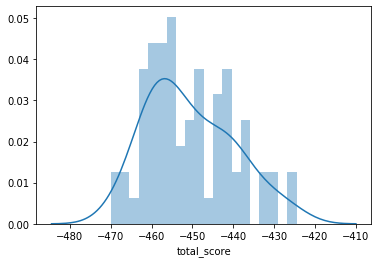

In [69]:
sns.distplot(dorder["total_score"], bins=20)

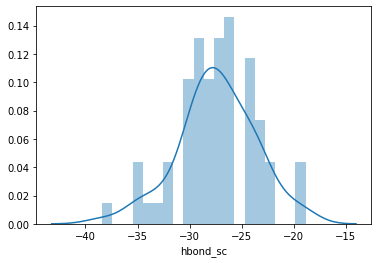

In [70]:
sns.distplot(dorder["hbond_sc"], bins=20)

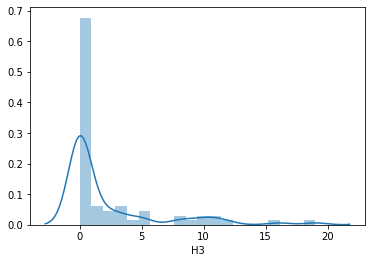

In [71]:
sns.distplot(dorder["H3"], bins=20)

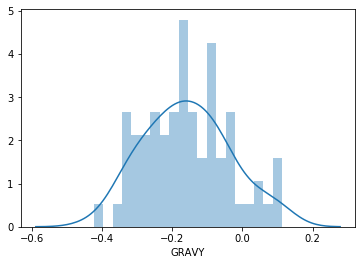

In [72]:
sns.distplot(dorder["GRAVY"], bins=20)

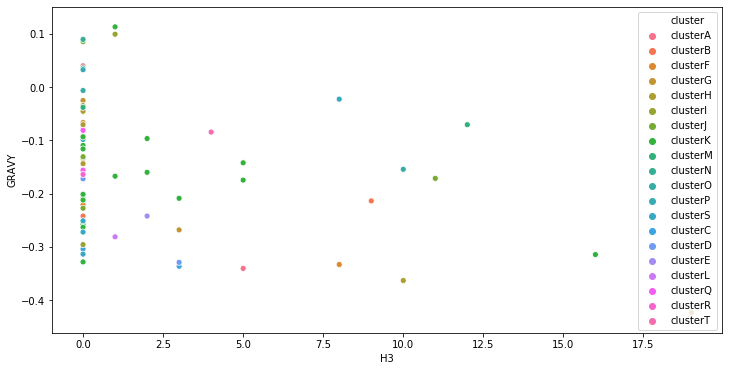

In [75]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=dorder.H3,y=dorder.GRAVY,hue=dorder.cluster)

In [73]:
with open("order_aa_seq.fasta",'w') as out_fasta:
    for index, row in dorder.iterrows():
        out_fasta.write(">%s\n%s\n" %(row['description'],row['sequence']))

In [77]:
for index,row in dorder.iterrows():
    pdb = row["description"] + ".pdb"
    source = row['cluster'] + '/best_designs/' + pdb
    target = "picked_cluster/" + pdb
    copyfile(source, target)

In [80]:
for index, row in dpicked_good.iterrows():
    print(row['sequence'][22])

P
P
P
F
P
P
P
L
V
V
F
I
V
P
P
F
V
P
F
F
I
P
I
P
P
P
P
F
F
V
L
P
I
V
P
P
P
F
V
A
L
F
I
F
A
P
A
A
V
P
A
I


In [30]:
for index,row in dorder.iterrows():
    new_fasta = "picked_cluster/" + row['description'] + ".fasta"
    new_ss3_pred = "picked_cluster/" + row['description'] + "/" + row['description'] + ".ss3"
    new_ss8_pred = "picked_cluster/" + row['description'] + "/" + row['description'] + ".ss8"
    with open(new_fasta, 'r') as in_fasta:
        for line in in_fasta:
            if line[0] == '>':
                seq = next(in_fasta).strip()
    gravy = GRAVY(seq)
    dorder.loc[index,'no_P_sequence'] = seq
    dorder.loc[index,'no_P_GRAVY'] = gravy
    ss3_pred,seq3 = read_raptor_file(new_ss3_pred)
    ss8_pred,seq8 = read_raptor_file(new_ss8_pred)
#    print(seq3,row['sequence'])

    dorder.loc[index,'no_P_ss3'] = ss3_pred

    dorder.loc[index,'no_P_ss8'] = ss8_pred

In [31]:
dorder["no_P_H3"] = dorder["no_P_ss3"].str.count('H')
dorder["no_P_H8"] = dorder["no_P_ss8"].str.count('H')

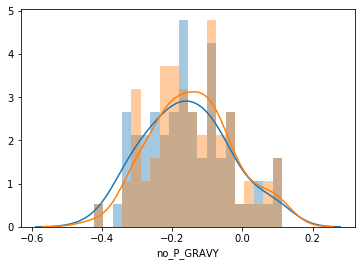

In [32]:
sns.distplot(dorder["GRAVY"], bins=20)
sns.distplot(dorder["no_P_GRAVY"], bins=20)

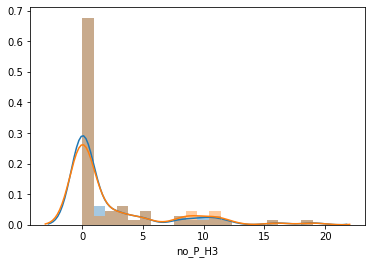

In [33]:
sns.distplot(dorder["H3"], bins=20)
sns.distplot(dorder["no_P_H3"], bins=20)

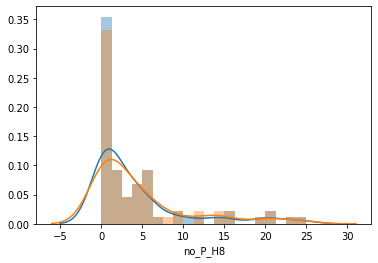

In [34]:
sns.distplot(dorder["H8"], bins=20)
sns.distplot(dorder["no_P_H8"], bins=20)

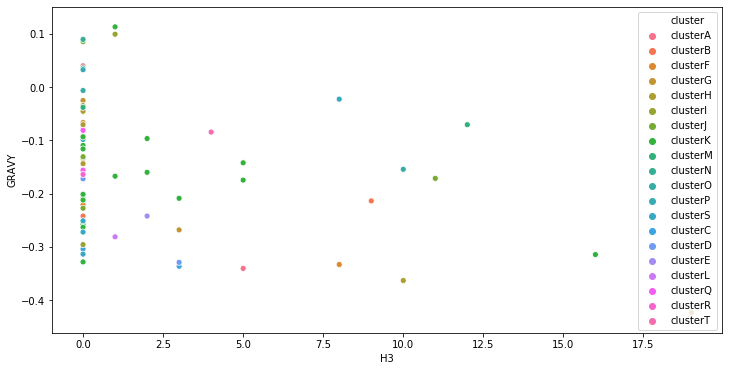

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=dorder.H3,y=dorder.GRAVY,hue=dorder.cluster)

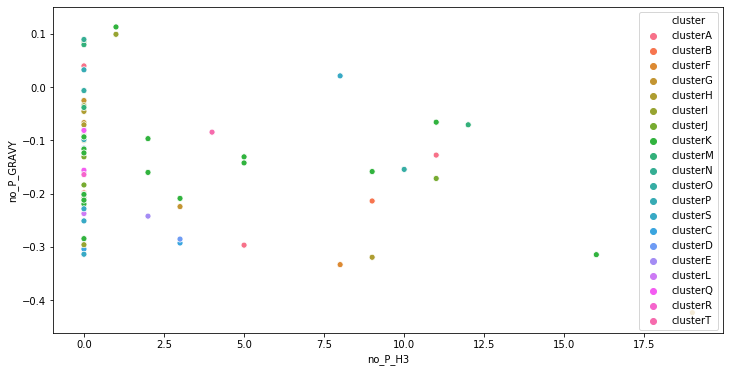

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=dorder.no_P_H3,y=dorder.no_P_GRAVY,hue=dorder.cluster)

In [37]:
print(dorder.loc[dorder['no_P_H3']>=6])

    SCORE:  total_score  aa_composition  angle_constraint  \
0   SCORE:     -461.139             0.0               0.0   
2   SCORE:     -449.140             0.0               0.0   
3   SCORE:     -443.607             0.0               0.0   
4   SCORE:     -441.042             0.0               0.0   
5   SCORE:     -455.582             0.0               0.0   
7   SCORE:     -460.489             0.0               0.0   
9   SCORE:     -450.725             0.0               0.0   
12  SCORE:     -459.469             0.0               0.0   
14  SCORE:     -456.052             0.0               0.0   
16  SCORE:     -443.995             0.0               0.0   
42  SCORE:     -463.442             0.0               0.0   
44  SCORE:     -455.175             0.0               0.0   

    atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
0                    0.0                0.611        0.0 -610.304  127.565   
2                    0.0                0.112     

In [38]:
print(dorder.loc[dorder['no_P_GRAVY']>=0.0])

    SCORE:  total_score  aa_composition  angle_constraint  \
1   SCORE:     -462.456             0.0               0.0   
6   SCORE:     -444.493             0.0               0.0   
8   SCORE:     -459.352             0.0               0.0   
10  SCORE:     -456.745             0.0               0.0   
11  SCORE:     -436.799             0.0               0.0   
13  SCORE:     -462.350             0.0               0.0   
15  SCORE:     -458.792             0.0               0.0   
16  SCORE:     -443.995             0.0               0.0   

    atom_pair_constraint  dihedral_constraint  dslf_fa13   fa_atr   fa_dun  \
1                    0.0                0.517        0.0 -624.222  124.425   
6                    0.0                1.961        0.0 -614.387  131.874   
8                    0.0                0.901        0.0 -618.184  121.488   
10                   0.0                0.762        0.0 -638.944  137.962   
11                   0.0                0.540        0.0 -62